###  Star Wars Text Analysis Classification of Hero vs. Villain

In [1]:
#import all packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in data set of star wars
df4 = pd.read_table('star-wars-movie-scripts/SW_EpisodeIV.txt', delim_whitespace=True, names=["index","character","dialogue"], encoding='latin1')
df5 = pd.read_table('star-wars-movie-scripts/SW_EpisodeV.txt', delim_whitespace=True, names=["index","character","dialogue"], encoding='latin1')
df6 = pd.read_table('star-wars-movie-scripts/SW_EpisodeVI.txt', delim_whitespace=True, names=["index","character","dialogue"], encoding='latin1')

In [3]:
#take a look at first couple rows
print(df4.head())
print(df4.shape)

       index character                                           dialogue
0  character  dialogue                                                NaN
1          1  THREEPIO  Did you hear that?  They've shut down the main...
2          2  THREEPIO                                      We're doomed!
3          3  THREEPIO  There'll be no escape for the Princess this time.
4          4  THREEPIO                                       What's that?
(1011, 3)


In [4]:
#remove top row and column
df4 = df4.iloc[1:1011, 1:3]
df4.head()

,character,dialogue
1,THREEPIO,Did you hear that? They've shut down the main...
2,THREEPIO,We're doomed!
3,THREEPIO,There'll be no escape for the Princess this time.
4,THREEPIO,What's that?
5,THREEPIO,I should have known better than to trust the l...


In [5]:
#take a look at first couple rows
print(df5.shape)
print(df5.head())

(840, 3)
       index character                                           dialogue
0  character  dialogue                                                NaN
1          1      LUKE  Echo Three to Echo Seven. Han, old buddy, do y...
2          2       HAN                    Loud and clear, kid. What's up?
3          3      LUKE  Well, I finished my circle. I don't pick up an...
4          4       HAN  There isn't enough life on this ice cube to fi...


In [6]:
#clean up dataframe
df5 = df5.iloc[1:840, 1:3]
df5.head()

,character,dialogue
1,LUKE,"Echo Three to Echo Seven. Han, old buddy, do y..."
2,HAN,"Loud and clear, kid. What's up?"
3,LUKE,"Well, I finished my circle. I don't pick up an..."
4,HAN,There isn't enough life on this ice cube to fi...
5,LUKE,Right. I'll see you shortly. There's a meteori...


In [7]:
#take a look at first couple rows
print(df6.shape)
print(df6.head())

(675, 3)
       index              character  \
0  character               dialogue   
1          1        SHUTTLE CAPTAIN   
2          2  DEATH STAR CONTROLLER   
3          3        SHUTTLE CAPTAIN   
4          4                OFFICER   

                                            dialogue  
0                                                NaN  
1  Command station, this is ST 321. Code Clearanc...  
2  The security deflector shield will be deactiva...  
3                       We're starting our approach.  
4  Inform the commander that Lord Vader's shuttle...  


In [8]:
#remove 0th index and column
df6 = df6.iloc[1:675, 1:3]
df6.head()

,character,dialogue
1,SHUTTLE CAPTAIN,"Command station, this is ST 321. Code Clearanc..."
2,DEATH STAR CONTROLLER,The security deflector shield will be deactiva...
3,SHUTTLE CAPTAIN,We're starting our approach.
4,OFFICER,Inform the commander that Lord Vader's shuttle...
5,OPERATOR,"Yes, sir."


In [9]:
#check for missing values
print(df4.isnull().sum())
print(df5.isnull().sum())
print(df6.isnull().sum())

character    0
dialogue     0
dtype: int64
character    0
dialogue     0
dtype: int64
character    0
dialogue     0
dtype: int64


In [10]:
#make a copy of merged dataset in case needed for later use
df_m = pd.concat([df4,df5,df6])
df_merge = df_m.copy()

In [11]:
#take a look at first couple lines and check for shape
print(df_merge.head())
print(df_merge.shape)

  character                                           dialogue
1  THREEPIO  Did you hear that?  They've shut down the main...
2  THREEPIO                                      We're doomed!
3  THREEPIO  There'll be no escape for the Princess this time.
4  THREEPIO                                       What's that?
5  THREEPIO  I should have known better than to trust the l...
(2523, 2)


In [60]:
#determine count of charactars in both heroes and villains
group = df_merge.groupby('character').count().sort_values('dialogue', ascending=False)
group[0:15]

,dialogue,Team
character,,
LUKE,494,494
HAN,459,459
THREEPIO,301,301
LEIA,227,227
VADER,140,140
BEN,115,115
LANDO,101,101
YODA,49,49
EMPEROR,44,44


In [13]:
#create list for both heroes and villains
list = []
villains = ('VADER', 'BEN', 'JABBA', 'EMPEROR', 'TARKIN')
heroes = ('YODA', 'LUKE', 'HAN', 'LEIA', 'THREEPIO')

for i in df_merge.character:
    if i in heroes:
        list.append('hero')
    elif i in villains:
        list.append('villain')
    else:
        list.append('other')

In [14]:
# take a look at first five of list
list[0:5]

['hero', 'hero', 'hero', 'hero', 'hero']

In [15]:
#create new column for Team
df_merge['Team'] = list
df_merge.head()

,character,dialogue,Team
1,THREEPIO,Did you hear that? They've shut down the main...,hero
2,THREEPIO,We're doomed!,hero
3,THREEPIO,There'll be no escape for the Princess this time.,hero
4,THREEPIO,What's that?,hero
5,THREEPIO,I should have known better than to trust the l...,hero


In [16]:
#take a look at distribution
df_merge.Team.value_counts()

hero       1530
other       640
villain     353
Name: Team, dtype: int64

In [17]:
#remove other from Team and also remove character
dat = df_merge[df_merge.Team != 'other']
da = dat.drop('character',axis=1)
da.head()

,dialogue,Team
1,Did you hear that? They've shut down the main...,hero
2,We're doomed!,hero
3,There'll be no escape for the Princess this time.,hero
4,What's that?,hero
5,I should have known better than to trust the l...,hero


In [18]:
#create column 'label' that will be used later for response variable
da['label'] = da.Team.map({'hero':1, 'villain':0})
data = da.drop('Team', axis=1)
data.head()

,dialogue,label
1,Did you hear that? They've shut down the main...,0
2,We're doomed!,0
3,There'll be no escape for the Princess this time.,0
4,What's that?,0
5,I should have known better than to trust the l...,0


In [19]:
#import text pre-processing packages
import nltk
import nltk.corpus
import re
import string
from nltk.corpus import stopwords
import nltk as nlp

In [20]:
#convert all dialogue to list of text in order to begin text pre-processing
tex = data['dialogue'].tolist()
text = str(tex)

In [21]:
#Make function to lowercase text, remove punctuation, remove whitespace and remove words containing numbers
def clean_text(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = text.strip()
    return text

clean = lambda x: clean_text(x)

In [22]:
# Let's take a look at the updated text
from nltk.tokenize import word_tokenize
updated_text = pd.DataFrame(data.dialogue.apply(clean))
updated_text.head()

,dialogue
1,did you hear that theyve shut down the main r...
2,were doomed
3,therell be no escape for the princess this time
4,whats that
5,i should have known better than to trust the l...


In [23]:
#still need to remove stop words and lemmatize to further clean
from nltk.tokenize import word_tokenize
text1 = updated_text['dialogue'].tolist()
text2 = str(text1)
stop_words = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def cleaner_text(text2):
    text2 = word_tokenize(text2)
    text2 = [i for i in text2 if not i in stop_words]
    text2 = " ".join([lemmatizer.lemmatize(t) for t in text2])
    return text2

clean2 = lambda x: cleaner_text(x)

In [24]:
# Let's take a look at the updated text2
updated = pd.DataFrame(updated_text.dialogue.apply(clean2))
updated.head()

,dialogue
1,hear theyve shut main reactor well destroyed s...
2,doomed
3,therell escape princess time
4,whats
5,known better trust logic halfsized thermocapsu...


In [25]:
#keep only pre-processed text;remove text from previous data frame and then merge data frames
data.drop(['dialogue'], axis=1, inplace=True)

In [26]:
# merge both data frames together
data2 = pd.concat([data, updated], axis=1)
data2.head()

,label,dialogue
1,0,hear theyve shut main reactor well destroyed s...
2,0,doomed
3,0,therell escape princess time
4,0,whats
5,0,known better trust logic halfsized thermocapsu...


In [27]:
#create target variable of hero or villain to be response vector;other will be converted into doc term matrix 
X = data2.dialogue
y = data2.label
print(X.shape)
print(y.shape)

(1883,)
(1883,)


In [28]:
#divide into training and test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1412,)
(471,)
(1412,)
(471,)


In [49]:
#instantiate, fit,and transform test and training set into document term matrix
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
print("training set:", X_train_dtm.shape)
print("test set:", X_test_dtm.shape)

training set: (1412, 1849)
test set: (471, 1849)


### This means there is 1883 rows or documents with 1849 columns or words.

In [57]:
#take a look at properties of weighted words
from sklearn.feature_extraction.text import TfidfTransformer
tf = TfidfTransformer(smooth_idf=True, use_idf=True)
tf.fit(X_train_dtm)
idf = pd.DataFrame(tf.idf_,index=vect.get_feature_names(),columns=['weights'])
sort = idf.sort_values(by=['weights'],ascending=False)
sort.weights[0:20]

aaargh       7.560323
secondary    7.560323
grandeur     7.560323
gravely      7.560323
grease       7.560323
sea          7.560323
greater      7.560323
greatly      7.560323
scum         7.560323
grip         7.560323
screaming    7.560323
grounded     7.560323
scout        7.560323
scoring      7.560323
grown        7.560323
guarded      7.560323
scheduled    7.560323
guest        7.560323
guild        7.560323
gunner       7.560323
Name: weights, dtype: float64

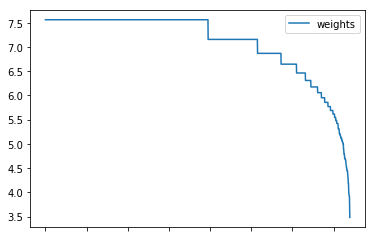

In [69]:
#plot weight distribution of words
%matplotlib inline
sort.plot()

### These are the top 20 highly weighted words

In [61]:
#since multinomial works well for wide data sets and word classification, instantiate mulitnomialNB classifier
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

Wall time: 7.08 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [62]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.86199575371549897

In [63]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[378,  17],
       [ 48,  28]], dtype=int64)

In [64]:
# print text for the 17 false positives(villain incorrectly classified as hero) 
X_test[y_test < y_pred_class]

637    never ill never turn dark side youve failed hi...
563                                          moment many
214                       master yoda darth vader father
527        different different mind must unlearn learned
489    placeis strong dark side force domain evil mus...
40     greeting exalted one allow introduce luke skyw...
446                                   vader herenow moon
455    hokey religion ancient weapon match good blast...
484    know calm peace passive jedi us force knowledg...
225    lukelukedo notdo underestimate power emperor s...
270    general kenobi year ago served father clone wa...
110                                   must allowed speak
209    strong force strong twilight upon soon night m...
283                         prepare make jump lightspeed
800    dont time sorrow commander battle station sure...
623                          luke must complete training
213    ohhh yet one thing remains vader must confront...
Name: dialogue, dtype: object

In [65]:
# print message text for the 48 false negatives 
#(hero incorrectly classified as villain)
X_test[y_test > y_pred_class]

421                                       could destroy u
396     han youre best smuggler business youre valuabl...
536                        apology accepted captain needa
516     must trying return stolen plan princess may ye...
487                                      imperial fighter
298     blast point accurate sand people imperial stor...
470              thats good taken first step larger world
65                                  last mighty chewbacca
529                         who foolish fool fool follows
617                                  unwise lower defense
900                                 stay attack formation
112          weakminded fool he using old jedi mind trick
60                                               da eitha
981                                           let go luke
1000                                remember force always
377     resistance mind probe considerable time extrac...
89                                              take away
760           

### The discrepanacy between the false negative and false positive could be due to this being an imbalanced dataset with 23% villains and 77% heroes.  Another project could take a look at how the model would perform if the dataset was balanced.  However, there are many classification models such as filatering ham and spam that also involve an imbalanced dataset.

In [66]:
#calculate AUC
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
metrics.roc_auc_score(y_test, y_pred_prob)

0.82614923384410388

In [72]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [73]:
#take a look at the time factor and train model
%time lr.fit(X_train_dtm,y_train)

Wall time: 983 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
#take a look at probabilities and predictions for test document term matrix
y_pred_class = lr.predict(X_test_dtm)
y_pred_prob = lr.predict_proba(X_test_dtm)[:,1]
metrics.accuracy_score(y_test, y_pred_class)

0.8428874734607219

In [76]:
#look at confusion matrix and auc curve
print(metrics.confusion_matrix(y_test, y_pred_class))
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
metrics.roc_auc_score(y_test, y_pred_prob)

[[376  19]
 [ 55  21]]


0.82614923384410388

### The accuracy drops on logistic regression with increased false negatives and false positives.  The Naive bayes classifier is the best so far.  Since Naive Bayes has a high bias and low variance compared to logistic regression, it will be a better classifier when the dataset follows the bias.  Adding more star wars charactars and their corresponding text would reduce the bias and increase the variance and thus may respond better to different models.  

### Further text analysis would look at the 'other' category that was dropped, utilize multi-class classification and also utilize keras deep learning for binomial classification. 